<a href="https://colab.research.google.com/github/angkmfirefoxygal/CIFAR10_CNN/blob/main/CIFAR10_Classification_withReg%26Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AS usual, a bit of setup
# If you need other libraries, you should import the libraries.

import os, sys
import torch
from torch import nn
from torch.nn import functional as F

import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [4]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

transforms_cifar10 = transforms.Compose([transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(*stats, inplace=True)])




transforms_cifar10_test = transforms.Compose([transforms.Resize((32, 32)),
                                  transforms.ToTensor(),
                                  transforms.Normalize(*stats)])

In [5]:
# Train dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms_cifar10)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Test dataset
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms_cifar10_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Classes of CIFAR-10 dataset
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

100%|██████████| 170498071/170498071 [00:05<00:00, 28939429.65it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle = True)

In [12]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


In [13]:
def imshow(img, title):
  plt.figure(figsize = (batch_size * 4, 4))
  plt.axis('off')
  plt.imshow(np.transpose(img,(1,2,0)))
  plt.title(title)
  plt.show()

In [14]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))

  img = torchvision.utils.make_grid(images)
  imshow(img, title = [str(x.item())for x in labels])

  return images, labels

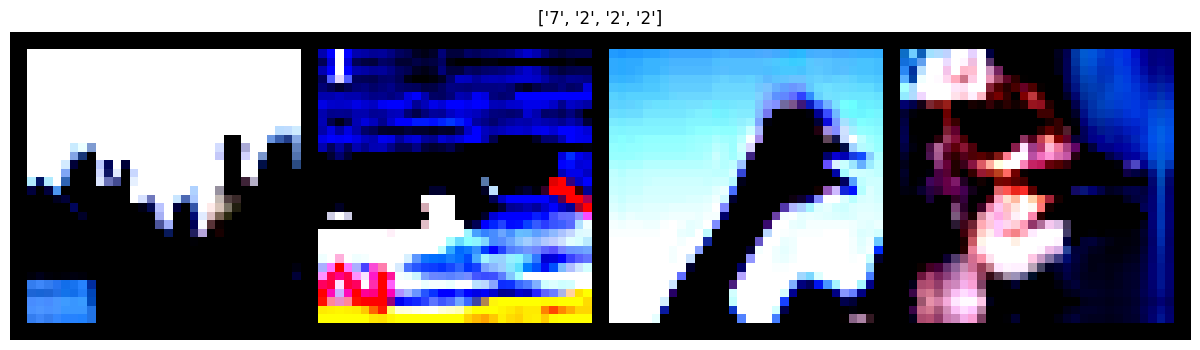

In [15]:
images, labels = show_batch_images(trainloader)

In [19]:
class BNNet(nn.Module):
  def __init__(self):
    super(BNNet, self).__init__()
    self.classifire = nn.Sequential(
        nn.Linear(784,48),
        nn.BatchNorm1d(48),
        nn.ReLU(),
        nn.Linear(48,24),
        nn.BatchNorm1d(24),
        nn.ReLU(),
        nn.Linear(24,10)
    )

    def forward(self, x):
      x = x.view(x.size(0), -1)
      x = self.classifier(x)
      return x

In [21]:
model = BNNet()
print(model)

BNNet(
  (classifire): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [22]:
batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [26]:
N_h = 100

model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

In [ ]:
max_epochs = 100

for epoch in range(max_epochs):
  pred_dropout = model(x_train)


